In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [44]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [45]:
! kaggle competitions download -c birdclef-2022 -p /content/

100% 6.12G/6.12G [00:56<00:00, 181MB/s]
100% 6.12G/6.12G [00:56<00:00, 116MB/s]


In [ ]:
! mkdir /content/birdclef-2022
! unzip /content/birdclef-2022.zip -d /content/birdclef-2022

In [53]:
import numpy as np
import librosa as lb
import librosa.display as lbd
from pathlib import Path
from matplotlib import pyplot as plt
import pandas as pd

import mimetypes
mimetypes.init()
mimetypes.add_type('audio/ogg','.ogg')
import IPython.display as ipd

Enter the Path:

In [50]:
DATA_ROOT = Path("/content/birdclef-2022")
TRAIN_AUDIO_ROOT = Path("/content/birdclef-2022/train_audio")
NO_CALL_ROOT = Path("/content/drive/MyDrive/no_call_detect")
TRAIN_AUDIO_IMAGES_SAVE_ROOT = Path("/content/drive/MyDrive/audio_images") # Where to save the mels images


In [95]:
import json
f = open(DATA_ROOT/"scored_birds.json")
data = json.load(f)
print(data)

['akiapo', 'aniani', 'apapan', 'barpet', 'crehon', 'elepai', 'ercfra', 'hawama', 'hawcre', 'hawgoo', 'hawhaw', 'hawpet1', 'houfin', 'iiwi', 'jabwar', 'maupar', 'omao', 'puaioh', 'skylar', 'warwhe1', 'yefcan']


Enter the Audio File

In [147]:
file_no = 0
byFileNo = False
byFilePath = True

In [195]:
df = pd.read_csv(NO_CALL_ROOT/"nocalldetection_for_shortaudio_fold0.csv")


if byFilePath:
    file_path = "zebdov/XC434900.ogg"
    file_name = file_path.split('/')[1]
    primary_label = file_path.split('/')[0]
elif byFileNo:
    file_no = file_no + 1
    print(file_no)

    # amewig/XC384955.ogg
    temp_rows = df.loc[df['primary_label'].str.match(primary_label)]
    file_path = temp_rows.iloc[file_no]['filename']
    file_name = file_path.split('/')[1]
else:
    primary_label = "amewig"
    file_name = 'XC593011.ogg'
    file_path = primary_label + '/' + file_name

print(file_path)
print(file_name)

zebdov/XC434900.ogg
XC434900.ogg


In [196]:
no_call_prob = df.loc[df['filename'].str.match(file_path)]
temp_str = no_call_prob.iloc[0]['nocalldetection']

call_prob = [float(x) for x in temp_str.split()]
print(call_prob)

[0.39623984694480896, 0.9805086255073547, 0.9668427109718323, 0.9073413014411926, 0.9215421080589294, 0.6134234666824341, 0.9702063798904419, 0.9895660877227783, 0.9167653918266296, 0.7192367315292358, 0.9413266777992249, 0.5161588788032532, 0.9123448133468628, 0.8954349160194397, 0.971939742565155, 0.7976707816123962, 0.9838415384292603, 0.8254725337028503, 0.9067967534065247, 0.6449716091156006, 0.963012158870697, 0.9220847487449646, 0.9015626907348633, 0.9647802710533142, 0.983951985836029, 0.8978192210197449, 0.8985195159912109, 0.6947355270385742, 0.9239295721054077, 0.8647636771202087, 0.9322344064712524, 0.930812418460846, 0.30453747510910034, 0.7397897839546204]


In [197]:
print(str( (TRAIN_AUDIO_IMAGES_SAVE_ROOT/primary_label/file_name).as_posix() + ".npy"))
mels = np.load( str( (TRAIN_AUDIO_IMAGES_SAVE_ROOT/primary_label/primary_label/file_name).as_posix() + ".npy") )

print(mels.shape)

/content/drive/MyDrive/audio_images/zebdov/XC434900.ogg.npy
(34, 128, 281)


Listen to Audio 

In [202]:
# ipd.Audio(str(TRAIN_AUDIO_ROOT/primary_label/file_name)

View the Mel

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


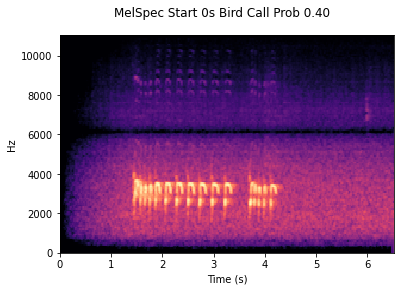

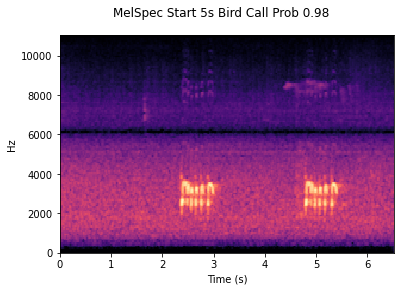

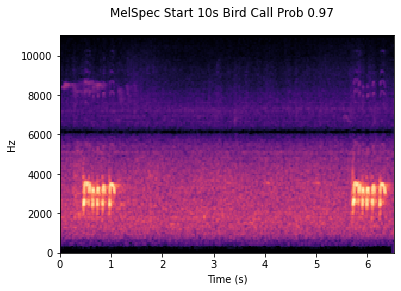

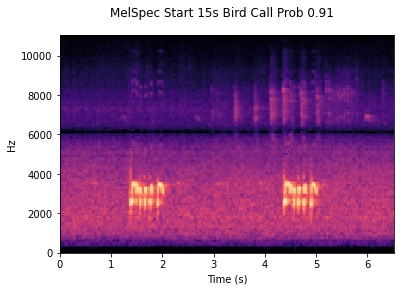

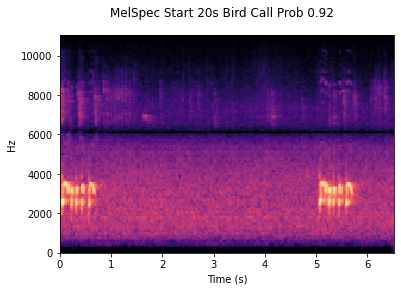

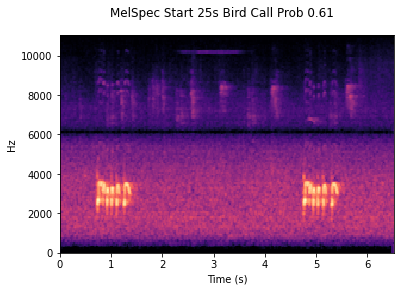

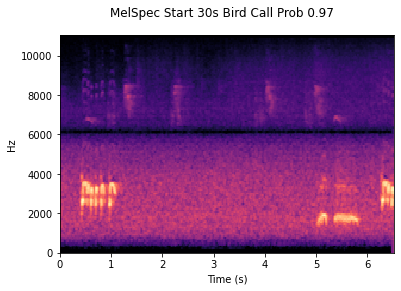

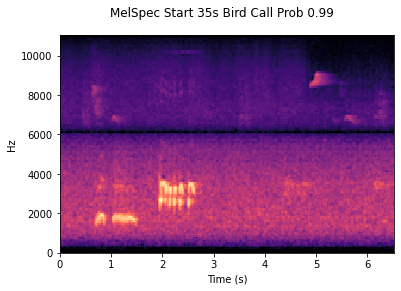

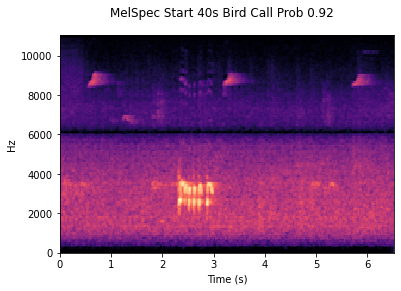

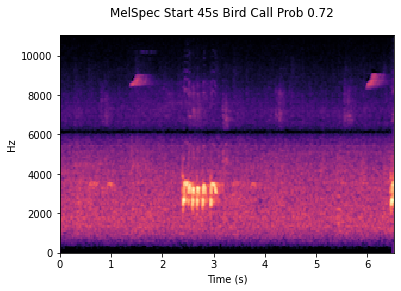

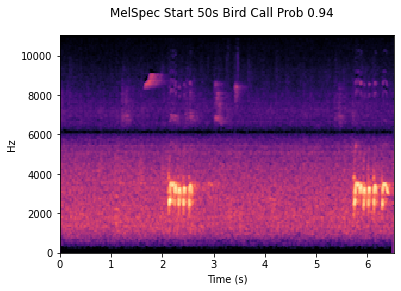

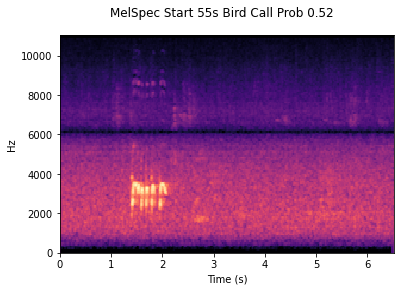

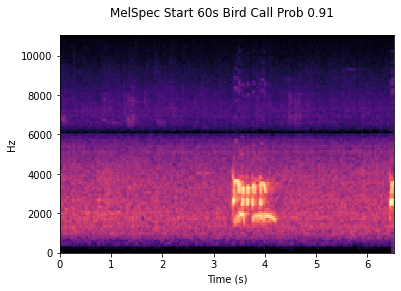

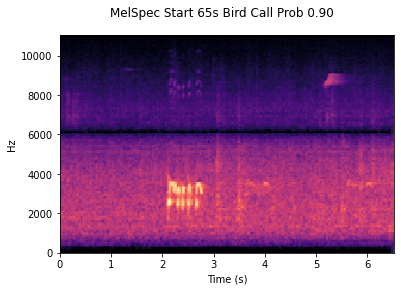

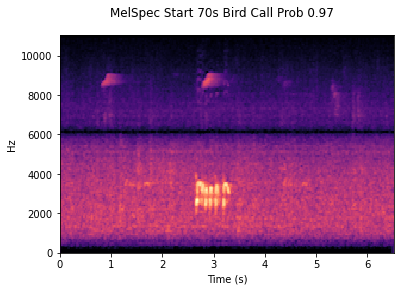

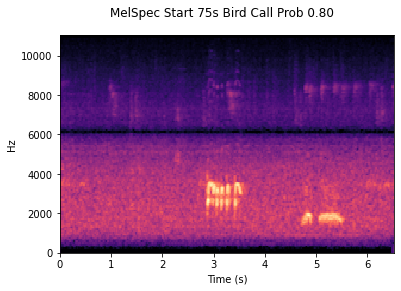

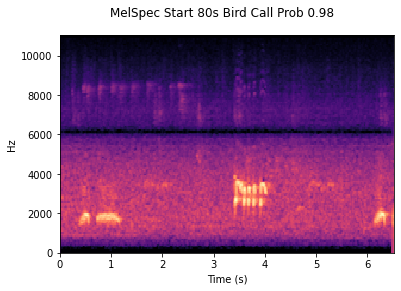

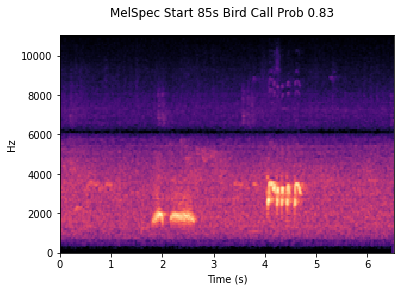

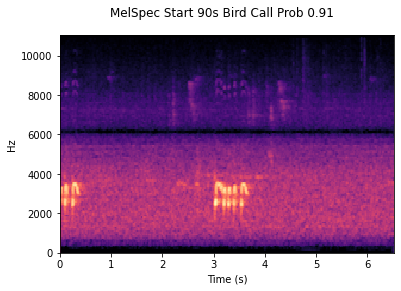

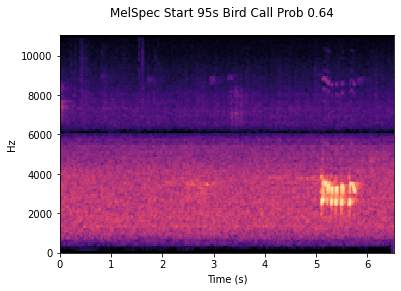

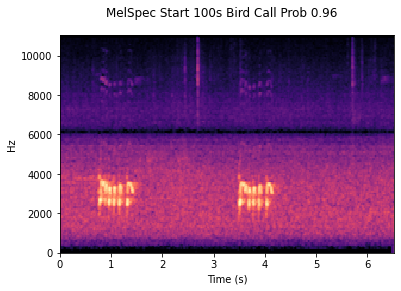

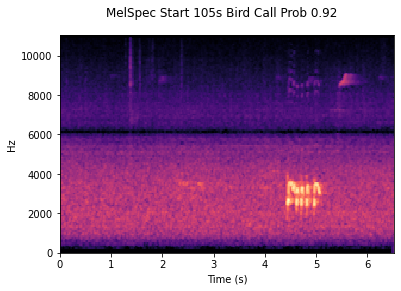

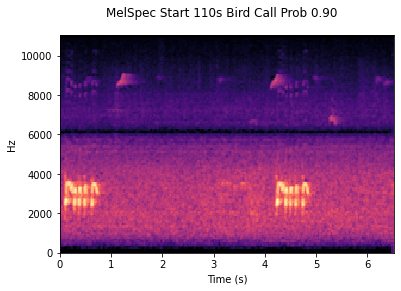

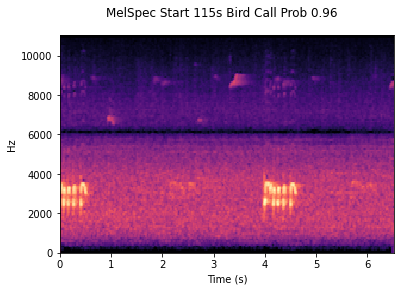

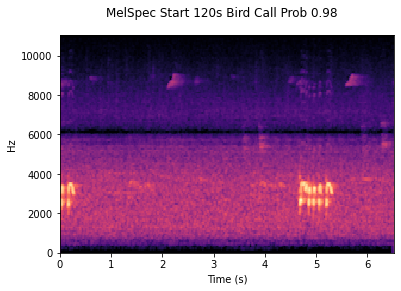

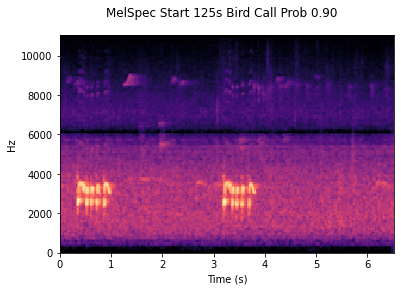

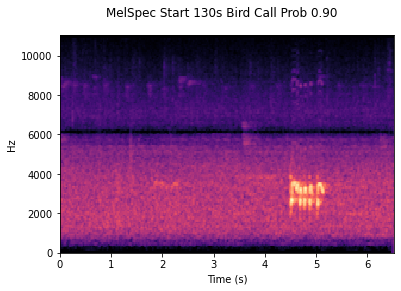

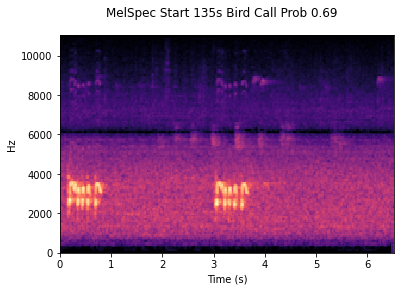

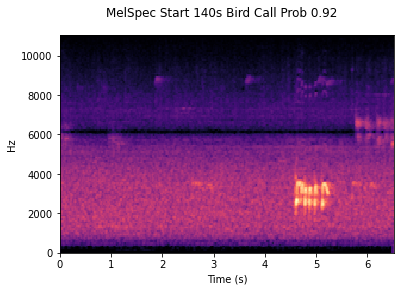

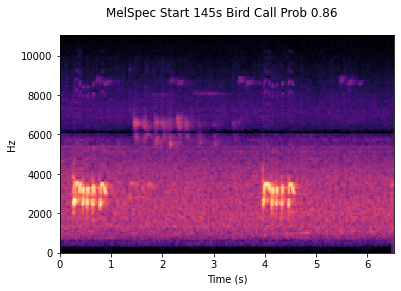

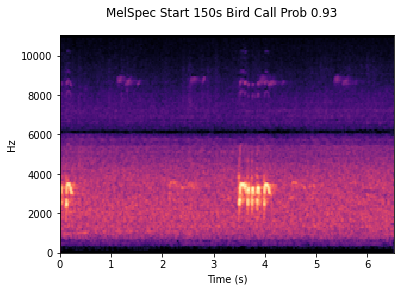

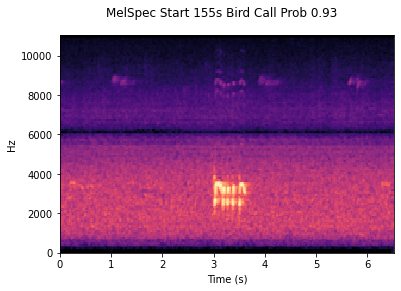

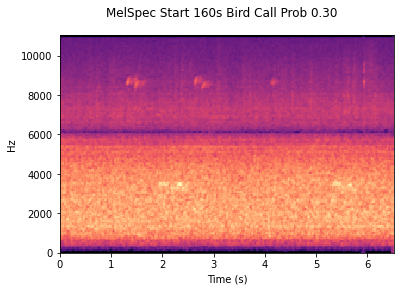

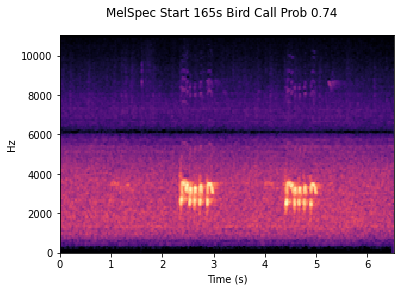

In [199]:
%matplotlib inline 
ipd.display(ipd.Audio(str(TRAIN_AUDIO_ROOT/primary_label/file_name)))

for i in range(len(mels)):
  fig = plt.figure()
  fig.suptitle(f"MelSpec Start {i*5}s Bird Call Prob {call_prob[i]:.2f}")
  lbd.specshow(mels[i], x_axis='s', y_axis='hz')
  #ipd.display(ipd.Audio(str(TRAIN_AUDIO_ROOT/primary_label/file_name)))
